<a href="https://colab.research.google.com/github/Ryanng72/AI/blob/main/Pretrained_models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install mtcnn


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


2/2 [==============================] - 0s 21ms/step
{'box': [250, 119, 21, 28], 'confidence': 0.9999242424964905, 'keypoints': {'left_eye': (258, 130), 'right_eye': (267, 132), 'nose': (264, 137), 'mouth_left': (257, 140), 'mouth_right': (265, 141)}}
{'box': [521, 111, 21, 29], 'confidence': 0.9997622966766357, 'keypoints': {'left_eye': (524, 123), 'right_eye': (534, 122), 'nose': (528, 129), 'mouth_left': (525, 133), 'mouth_right': (535, 132)}}
{'box': [47, 120, 21, 26], 'confidence': 0.9996927976608276, 'keypoints': {'left_eye': (55, 129), 'right_eye': (65, 130), 'nose': (60, 136), 'mouth_left': (53, 139), 'mouth_right': (61, 140)}}
{'box': [108, 117, 22, 26], 'confidence': 0.9994503259658813, 'keypoints': {'left_eye': (114, 126), 'right_eye': (125, 126), 'nose': (120, 132), 'mouth_left': (114, 136), 'mouth_right': (125, 136)}}
{'box': [591, 125, 20, 27], 'confidence': 0.9986809492111206, 'keypoints': {'left_eye': (598, 135), 'right_eye': (607, 138), 'nose': (601, 142), 'mouth_left':

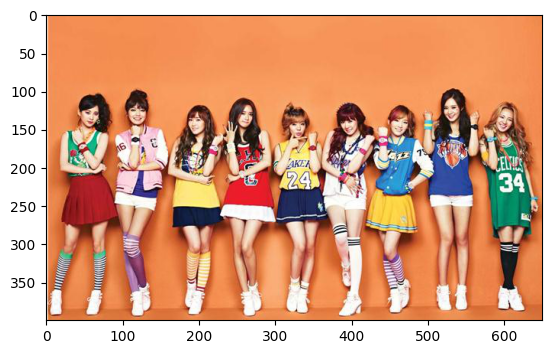

In [ ]:
from mtcnn import MTCNN
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/Image/AI/test2.jpg'
img = plt.imread(filename)
plt.imshow(img)
detector = MTCNN()
faces = detector.detect_faces(img)
for face in faces:
  print(face)

2/2 [==============================] - 0s 14ms/step


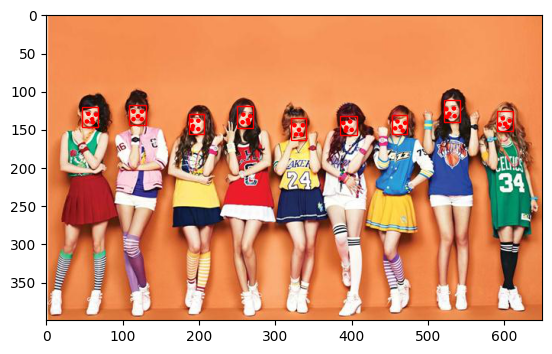

In [ ]:
#2
from mtcnn import MTCNN
import matplotlib.pyplot as plt
filename = '/content/drive/MyDrive/Image/AI/test2.jpg'
img = plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
plt.imshow(img)
ax=plt.gca()
for face in faces:
  x,y,width,height=face['box']
  rect = plt.Rectangle((x,y),width,height,
                       fill = False, color='red')
  ax.add_patch(rect)
  plt.savefig('/content/drive/MyDrive/Image/AI')
  for key,value in face['keypoints'].items():
    dot = plt.Circle(value,radius = 2,color='red')
    ax.add_patch(dot)
plt.show()  


2/2 [==============================] - 0s 16ms/step


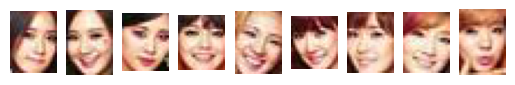

In [ ]:
#3
from mtcnn import MTCNN
import matplotlib.pyplot as plt
def draw_faces(filename, result_list):
    data = plt.imread(filename)
    for i in range(len(result_list)):
      x1, y1, width, height = result_list[i]['box']
      x2, y2 = x1 + width, y1 +height
      plt.subplot(1, len(result_list), i+1)
      plt.axis('off')
      plt.imshow(data[y1:y2, x1:x2])
      #plt.savefig('/content/drive/MyDrive/Image')
    plt.show()
filename='/content/drive/MyDrive/Image/AI/test2.jpg'
img=plt.imread(filename)
detector = MTCNN()
faces = detector.detect_faces(img)
draw_faces(filename,faces)

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np

model = ResNet50(weights='imagenet')

img_path = '/content/drive/MyDrive/Image/AI/kappa.jpg'
img = image.load_img(img_path, target_size=(224, 224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

preds = model.predict(x)
# decode the results into a list of tuples (class, description, probability)
# (one such list for each sample in the batch)
print('Predicted:', decode_predictions(preds, top=3)[0])

35363/35363 [==============================] - 0s 0us/step
Predicted: [('n01641577', 'bullfrog', 0.2026743), ('n01667114', 'mud_turtle', 0.08966333), ('n02514041', 'barracouta', 0.07586867)]
